# 필요 라이브러리 import

In [1]:
from google.colab import drive
import zipfile
import os
import random
from IPython.display import Image as show_image
import matplotlib.pyplot as plt
import json
import glob
import numpy as np
import pandas as pd
from ast import literal_eval
from PIL import Image, ImageDraw
from tqdm import tqdm
import yaml
from collections import OrderedDict
import shutil

# 드라이브 마운트 후 압축 해제

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 파일 경로 설정
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/Object Detection/Cat Breeds Detection.v2i.yolov11.zip'
extract_path = '/content/'

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"압축 해제 완료: {zip_file_path} -> {extract_path}")
except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다: {zip_file_path}")
except zipfile.BadZipFile:
    print(f"잘못된 zip 파일입니다: {zip_file_path}")
except Exception as e:
    print(f"압축 해제 중 오류 발생: {e}")

압축 해제 완료: /content/drive/MyDrive/Colab Notebooks/Object Detection/Cat Breeds Detection.v2i.yolov11.zip -> /content/


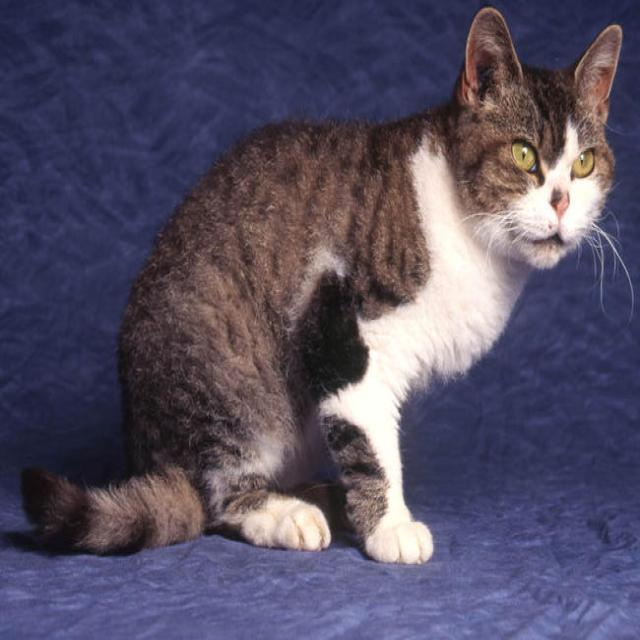

In [4]:
from IPython.display import Image as show_image # ipynb 파일의 cell에서 이미지를 시각화하기 위한 라이브러리
show_image('/content/test/images/American-Wirehair_12_jpg.rf.dc8b38724d2d4d306bac2381d9fb3549.jpg')

test 폴더의 이미지 개수: 104


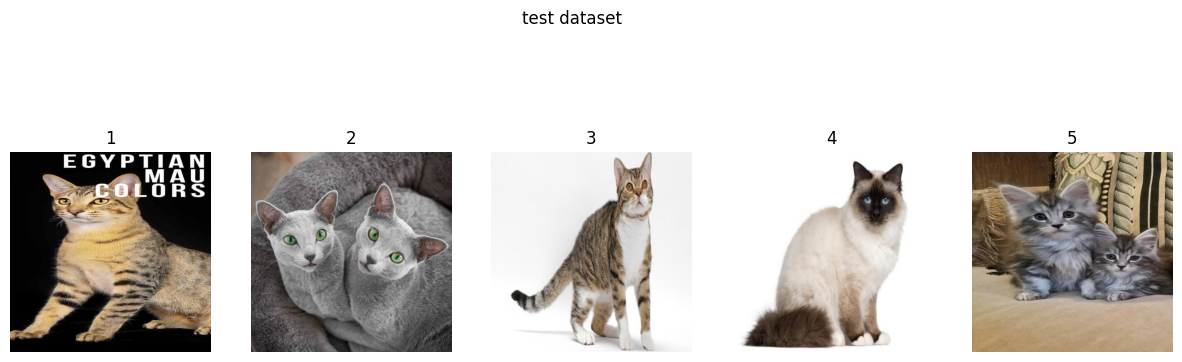

train 폴더의 이미지 개수: 2168


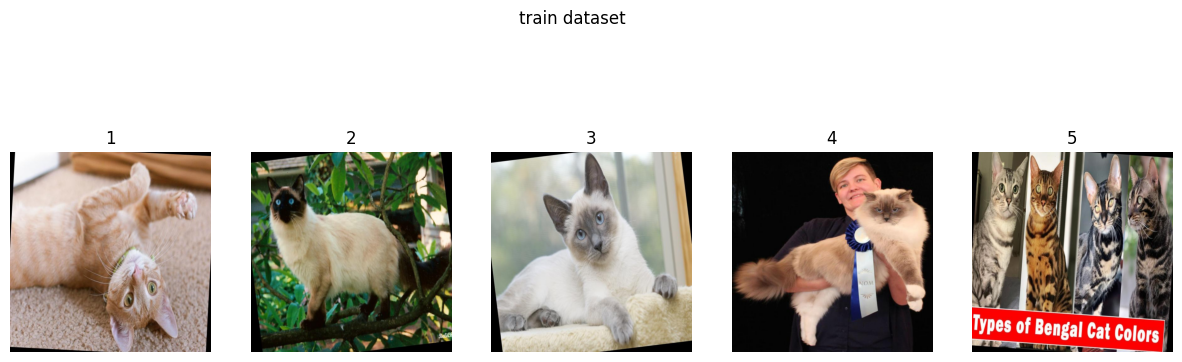

valid 폴더의 이미지 개수: 207


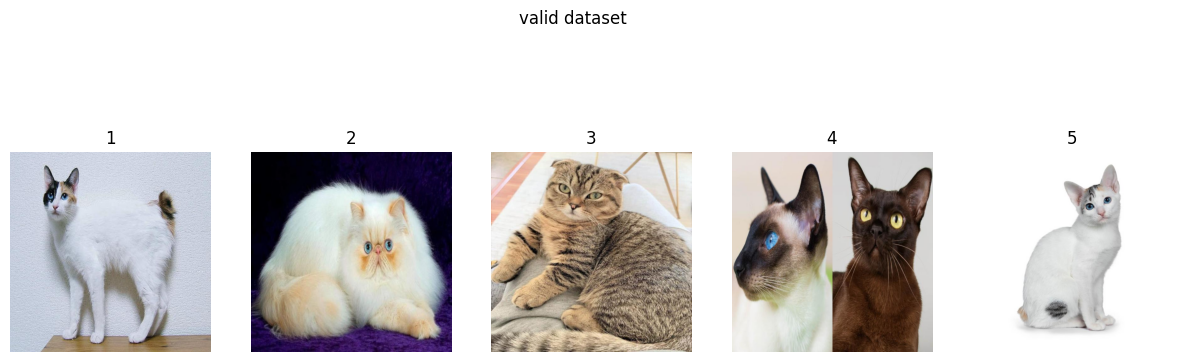

In [5]:
# 이미지 폴더 경로 설정
base_path = '/content/'
folders = ['test', 'train', 'valid']

for folder in folders:
    image_folder = os.path.join(base_path, folder, 'images')
    if not os.path.exists(image_folder):
        print(f"폴더가 존재하지 않습니다: {image_folder}")
        continue

    image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]
    num_images = len(image_files)
    print(f"{folder} 폴더의 이미지 개수: {num_images}")

    # 랜덤으로 5개 이미지 선택 (중복 없이)
    selected_images = random.sample(image_files, min(5, num_images))

    # 폴더별 5장의 이미지 시각화 (이미지 이름 대신 번호 사용)
    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(selected_images):
        img_path = os.path.join(image_folder, image_file)
        try:
            img = Image.open(img_path)
            plt.subplot(1, 5, i + 1)
            plt.imshow(img)
            plt.title(f"{i+1}")  # 이미지 번호 표시
            plt.axis('off')
        except Exception as e:
            print(f"이미지 로드 중 오류 발생: {e}, 파일: {img_path}")

    plt.suptitle(f"{folder} dataset")
    plt.show()

In [6]:
!pip3 install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 51.9 MB/s eta 0:00:00


In [7]:
import ultralytics
from ultralytics import YOLO
from IPython.display import Image as show_image
import glob
import random
import matplotlib.pyplot as plt
ultralytics.checks()

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/112.6 GB disk)


In [8]:
model = YOLO('yolo11s.pt')

100%|██████████| 18.4M/18.4M [00:00<00:00, 66.4MB/s]


In [9]:
project = "./runs/detect"
name = "train"

dataset_path = "/content/data.yaml"

In [10]:
import torch
torch.cuda.empty_cache()

In [11]:
model.train(
    data=dataset_path, # 데이터셋 경로(yaml파일)
    epochs=30, # 최대 학습 epoch
    project=project, # project 폴더 이름
    name=name, # experiment 폴더 이름
    exist_ok=False, # 덮어쓰기 여부
    seed=42, # 재현성을 위한 시드 설정
    optimizer='AdamW', # optimizer는 AdamW로 지정
    patience=5, # 30epoch동안 loss가 개선되지 않으면 종료
    batch=32, # 훈련 배치 사이즈는 16
    imgsz=640, # 이미지 사이즈는 832
)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/data.yaml, epochs=30, time=None, patience=5, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=./runs/detect, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 93.3MB/s]


Overriding model.yaml nc=80 with nc=22

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 261MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 2168 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2168/2168 [00:01<00:00, 1864.28it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/valid/labels... 207 images, 0 backgrounds, 0 corrupt: 100%|██████████| 207/207 [00:00<00:00, 1184.63it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      8.65G      1.358      3.463      1.861         74        640: 100%|██████████| 68/68 [00:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]

                   all        207        243          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      8.62G      1.333       2.83      1.828         64        640: 100%|██████████| 68/68 [00:45<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]

                   all        207        243      0.622     0.0127    0.00206   0.000468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.62G      1.305      2.713      1.803         74        640: 100%|██████████| 68/68 [00:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        207        243    0.00116      0.177      0.001    0.00022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.62G      1.279      2.691      1.779         64        640: 100%|██████████| 68/68 [00:46<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        207        243    0.00438       0.47    0.00811    0.00281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      8.62G      1.255      2.634      1.746         79        640: 100%|██████████| 68/68 [00:45<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

                   all        207        243       0.45      0.149     0.0637     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.62G      1.197      2.576      1.705         72        640: 100%|██████████| 68/68 [00:45<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]


                   all        207        243    0.00519      0.234     0.0114    0.00232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.62G      1.202      2.556      1.702         72        640: 100%|██████████| 68/68 [00:50<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        207        243      0.174      0.259     0.0517     0.0221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.62G      1.129      2.489      1.646         77        640: 100%|██████████| 68/68 [00:46<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]

                   all        207        243      0.232      0.168     0.0587     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.66G      1.141      2.472       1.65         75        640: 100%|██████████| 68/68 [00:44<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]


                   all        207        243      0.155      0.365      0.098     0.0565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.62G      1.123      2.452      1.639         74        640: 100%|██████████| 68/68 [00:46<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]

                   all        207        243       0.38      0.151      0.083     0.0478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.62G      1.106      2.446      1.628         69        640: 100%|██████████| 68/68 [00:47<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        207        243      0.187      0.298     0.0833     0.0522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.66G      1.096      2.423      1.616         80        640: 100%|██████████| 68/68 [00:44<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        207        243      0.171      0.354     0.0924     0.0578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      8.66G      1.048      2.387      1.586         70        640: 100%|██████████| 68/68 [00:45<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        207        243      0.317      0.209      0.074     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.62G      1.068      2.388      1.586         67        640: 100%|██████████| 68/68 [00:51<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        207        243      0.124      0.444      0.112     0.0721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.66G       1.05      2.374      1.587         69        640: 100%|██████████| 68/68 [00:44<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]

                   all        207        243      0.139      0.253     0.0662     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      8.67G      1.036      2.345      1.568         75        640: 100%|██████████| 68/68 [00:45<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        207        243      0.171      0.397      0.129     0.0751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.62G      1.032      2.352      1.565         74        640: 100%|██████████| 68/68 [00:47<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        207        243      0.246      0.296       0.11     0.0722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      8.62G     0.9952      2.321      1.529         70        640: 100%|██████████| 68/68 [00:49<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


                   all        207        243       0.26      0.235      0.118     0.0649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      8.62G     0.9741      2.298      1.526         82        640: 100%|██████████| 68/68 [00:44<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        207        243      0.248      0.329      0.147     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.65G      0.983      2.282      1.539         79        640: 100%|██████████| 68/68 [00:46<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        207        243      0.219      0.385      0.151     0.0911


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       8.6G     0.9174       2.17      1.759         27        640: 100%|██████████| 68/68 [00:49<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.00s/it]

                   all        207        243      0.165      0.286       0.11     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.62G     0.8862       2.07      1.698         26        640: 100%|██████████| 68/68 [00:43<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all        207        243      0.179      0.325      0.137     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      8.62G     0.8714      2.031      1.677         24        640: 100%|██████████| 68/68 [00:44<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]

                   all        207        243      0.152      0.397      0.172      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       8.6G     0.8518      1.989      1.657         24        640: 100%|██████████| 68/68 [00:47<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        207        243      0.165      0.378      0.181      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      8.62G     0.8301      1.978       1.64         34        640: 100%|██████████| 68/68 [00:45<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        207        243      0.245      0.341      0.193      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       8.6G     0.8215      1.925      1.628         23        640: 100%|██████████| 68/68 [00:43<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        207        243      0.165      0.432      0.206      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       8.6G     0.7955      1.899      1.609         29        640: 100%|██████████| 68/68 [00:44<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        207        243       0.16      0.334      0.193      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.62G     0.7791      1.862      1.594         25        640: 100%|██████████| 68/68 [00:47<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        207        243      0.223      0.356      0.214      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       8.6G     0.7696       1.82       1.58         29        640: 100%|██████████| 68/68 [00:44<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        207        243      0.205      0.344      0.221       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.62G     0.7548      1.788      1.563         29        640: 100%|██████████| 68/68 [00:43<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]

                   all        207        243      0.213      0.358      0.216      0.147



30 epochs completed in 0.424 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,421,314 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


                   all        207        243       0.21       0.34      0.222       0.15
   American Short Type         11         11       0.13      0.182     0.0753     0.0597
                Bengal          5         11      0.403      0.455      0.338      0.229
                Birman         11         13      0.138     0.0769     0.0833     0.0517
                Bombay          4          4      0.188       0.75      0.698      0.433
          British Type         20         22      0.237      0.727      0.372      0.267
               Burmese          8          9          0          0     0.0798     0.0641
          Egyptian Mau         12         15      0.266      0.333      0.227     0.0832
      Exotic Shorthair          2          2          0          0     0.0553     0.0473
      Japanese Bobtail         12         12       0.37       0.75      0.711      0.564
            Maine Coon         11         18      0.213      0.167      0.209      0.134
              Munchki

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e3d54ac19f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

In [12]:
print(type(model.names), len(model.names))
print(model.names)

<class 'dict'> 22
{0: 'Abyssinian', 1: 'American Short Type', 2: 'Bengal', 3: 'Birman', 4: 'Bombay', 5: 'British Type', 6: 'Burmese', 7: 'Egyptian Mau', 8: 'Exotic Shorthair', 9: 'Japanese Bobtail', 10: 'Maine Coon', 11: 'Munchkin', 12: 'Norwegian Forest', 13: 'Oriental', 14: 'Persian', 15: 'Ragdoll', 16: 'Rex Type', 17: 'Russian Blue', 18: 'Scottish Fold', 19: 'Siamese Type', 20: 'Siberian', 21: 'Turkish Angora'}


학습 시 Loss 및 성능 지표 변화 시각화

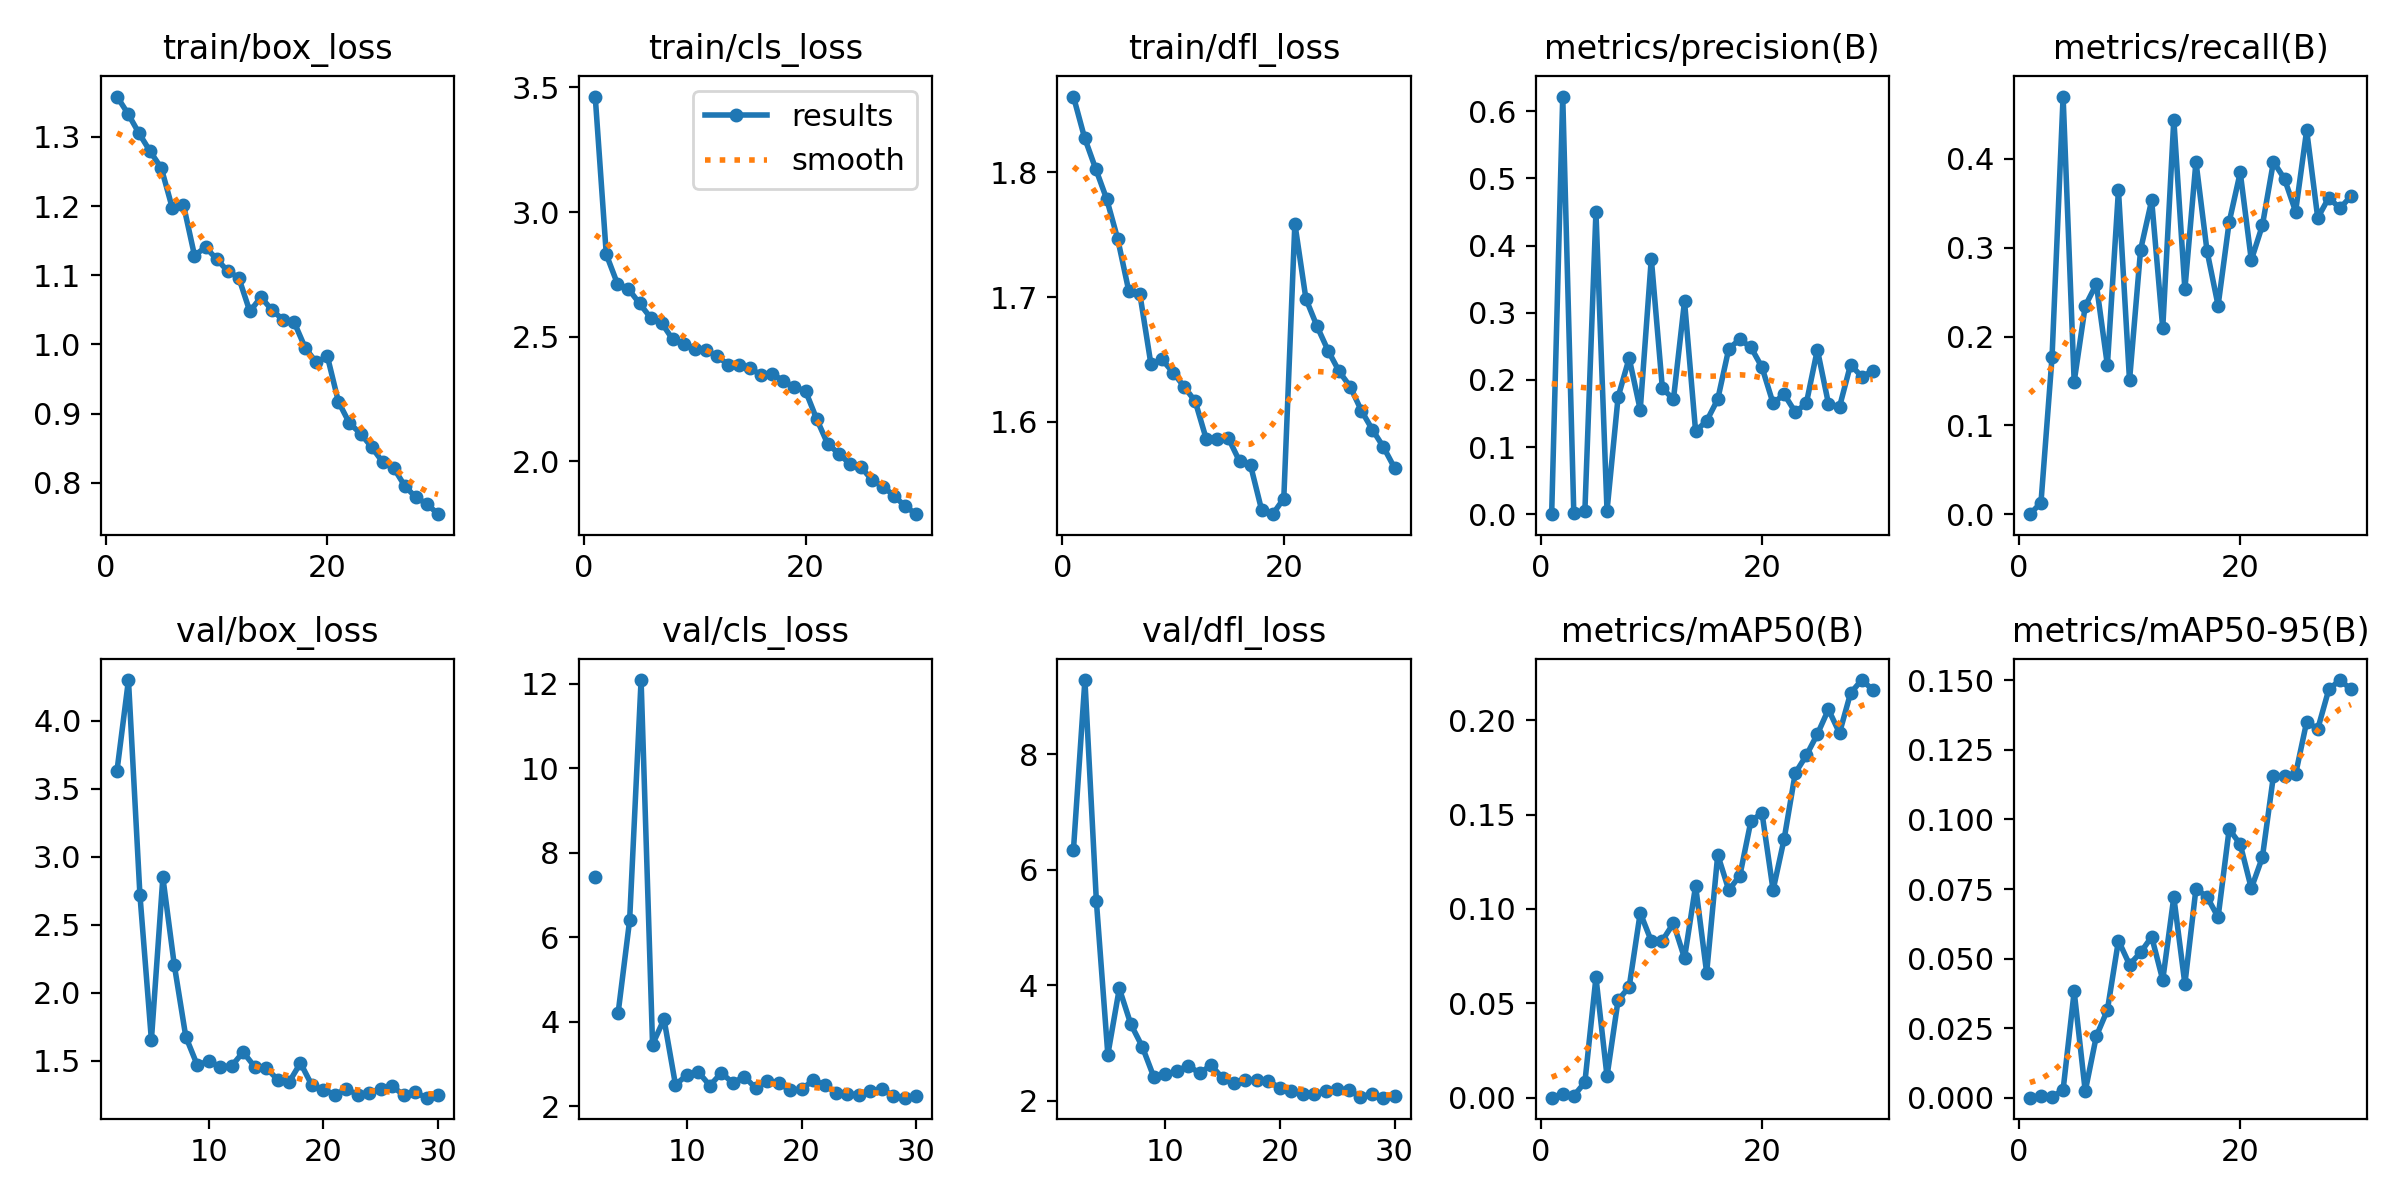

In [17]:
results_png_path = f"/content/runs/detect/train/results.png"  # Construct the expected path
show_image(results_png_path, width=1600)

In [19]:
model = YOLO(f"{project}/{name}/weights/best.pt")
print(type(model.names), len(model.names))
print(model.names)

<class 'dict'> 22
{0: 'Abyssinian', 1: 'American Short Type', 2: 'Bengal', 3: 'Birman', 4: 'Bombay', 5: 'British Type', 6: 'Burmese', 7: 'Egyptian Mau', 8: 'Exotic Shorthair', 9: 'Japanese Bobtail', 10: 'Maine Coon', 11: 'Munchkin', 12: 'Norwegian Forest', 13: 'Oriental', 14: 'Persian', 15: 'Ragdoll', 16: 'Rex Type', 17: 'Russian Blue', 18: 'Scottish Fold', 19: 'Siamese Type', 20: 'Siberian', 21: 'Turkish Angora'}


In [20]:
test_name = "test_result" # 테스트 결과를 저장할 폴더 이름 설정
test_result = model.val(imgsz=640, split="test", name=test_name) # 테스트 데이터셋 평가 실행

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,421,314 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /content/test/labels... 104 images, 0 backgrounds, 0 corrupt: 100%|██████████| 104/104 [00:00<00:00, 1123.35it/s]

val: New cache created: /content/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]


                   all        104        120      0.226      0.457      0.263      0.177
   American Short Type          5          5          0          0      0.113     0.0805
                Bengal          5          6      0.379      0.667      0.572      0.346
                Birman          1          1          0          0      0.111     0.0884
                Bombay          6          6      0.352      0.833      0.477      0.307
          British Type          8         12      0.164        0.5      0.297      0.161
               Burmese          8         10      0.286      0.124      0.246      0.137
          Egyptian Mau          5          8      0.154       0.25      0.119     0.0809
      Exotic Shorthair          2          2      0.152        0.5      0.126     0.0951
      Japanese Bobtail          2          2      0.133          1      0.595      0.407
            Maine Coon          7          7        0.3      0.429      0.206      0.137
              Munchki

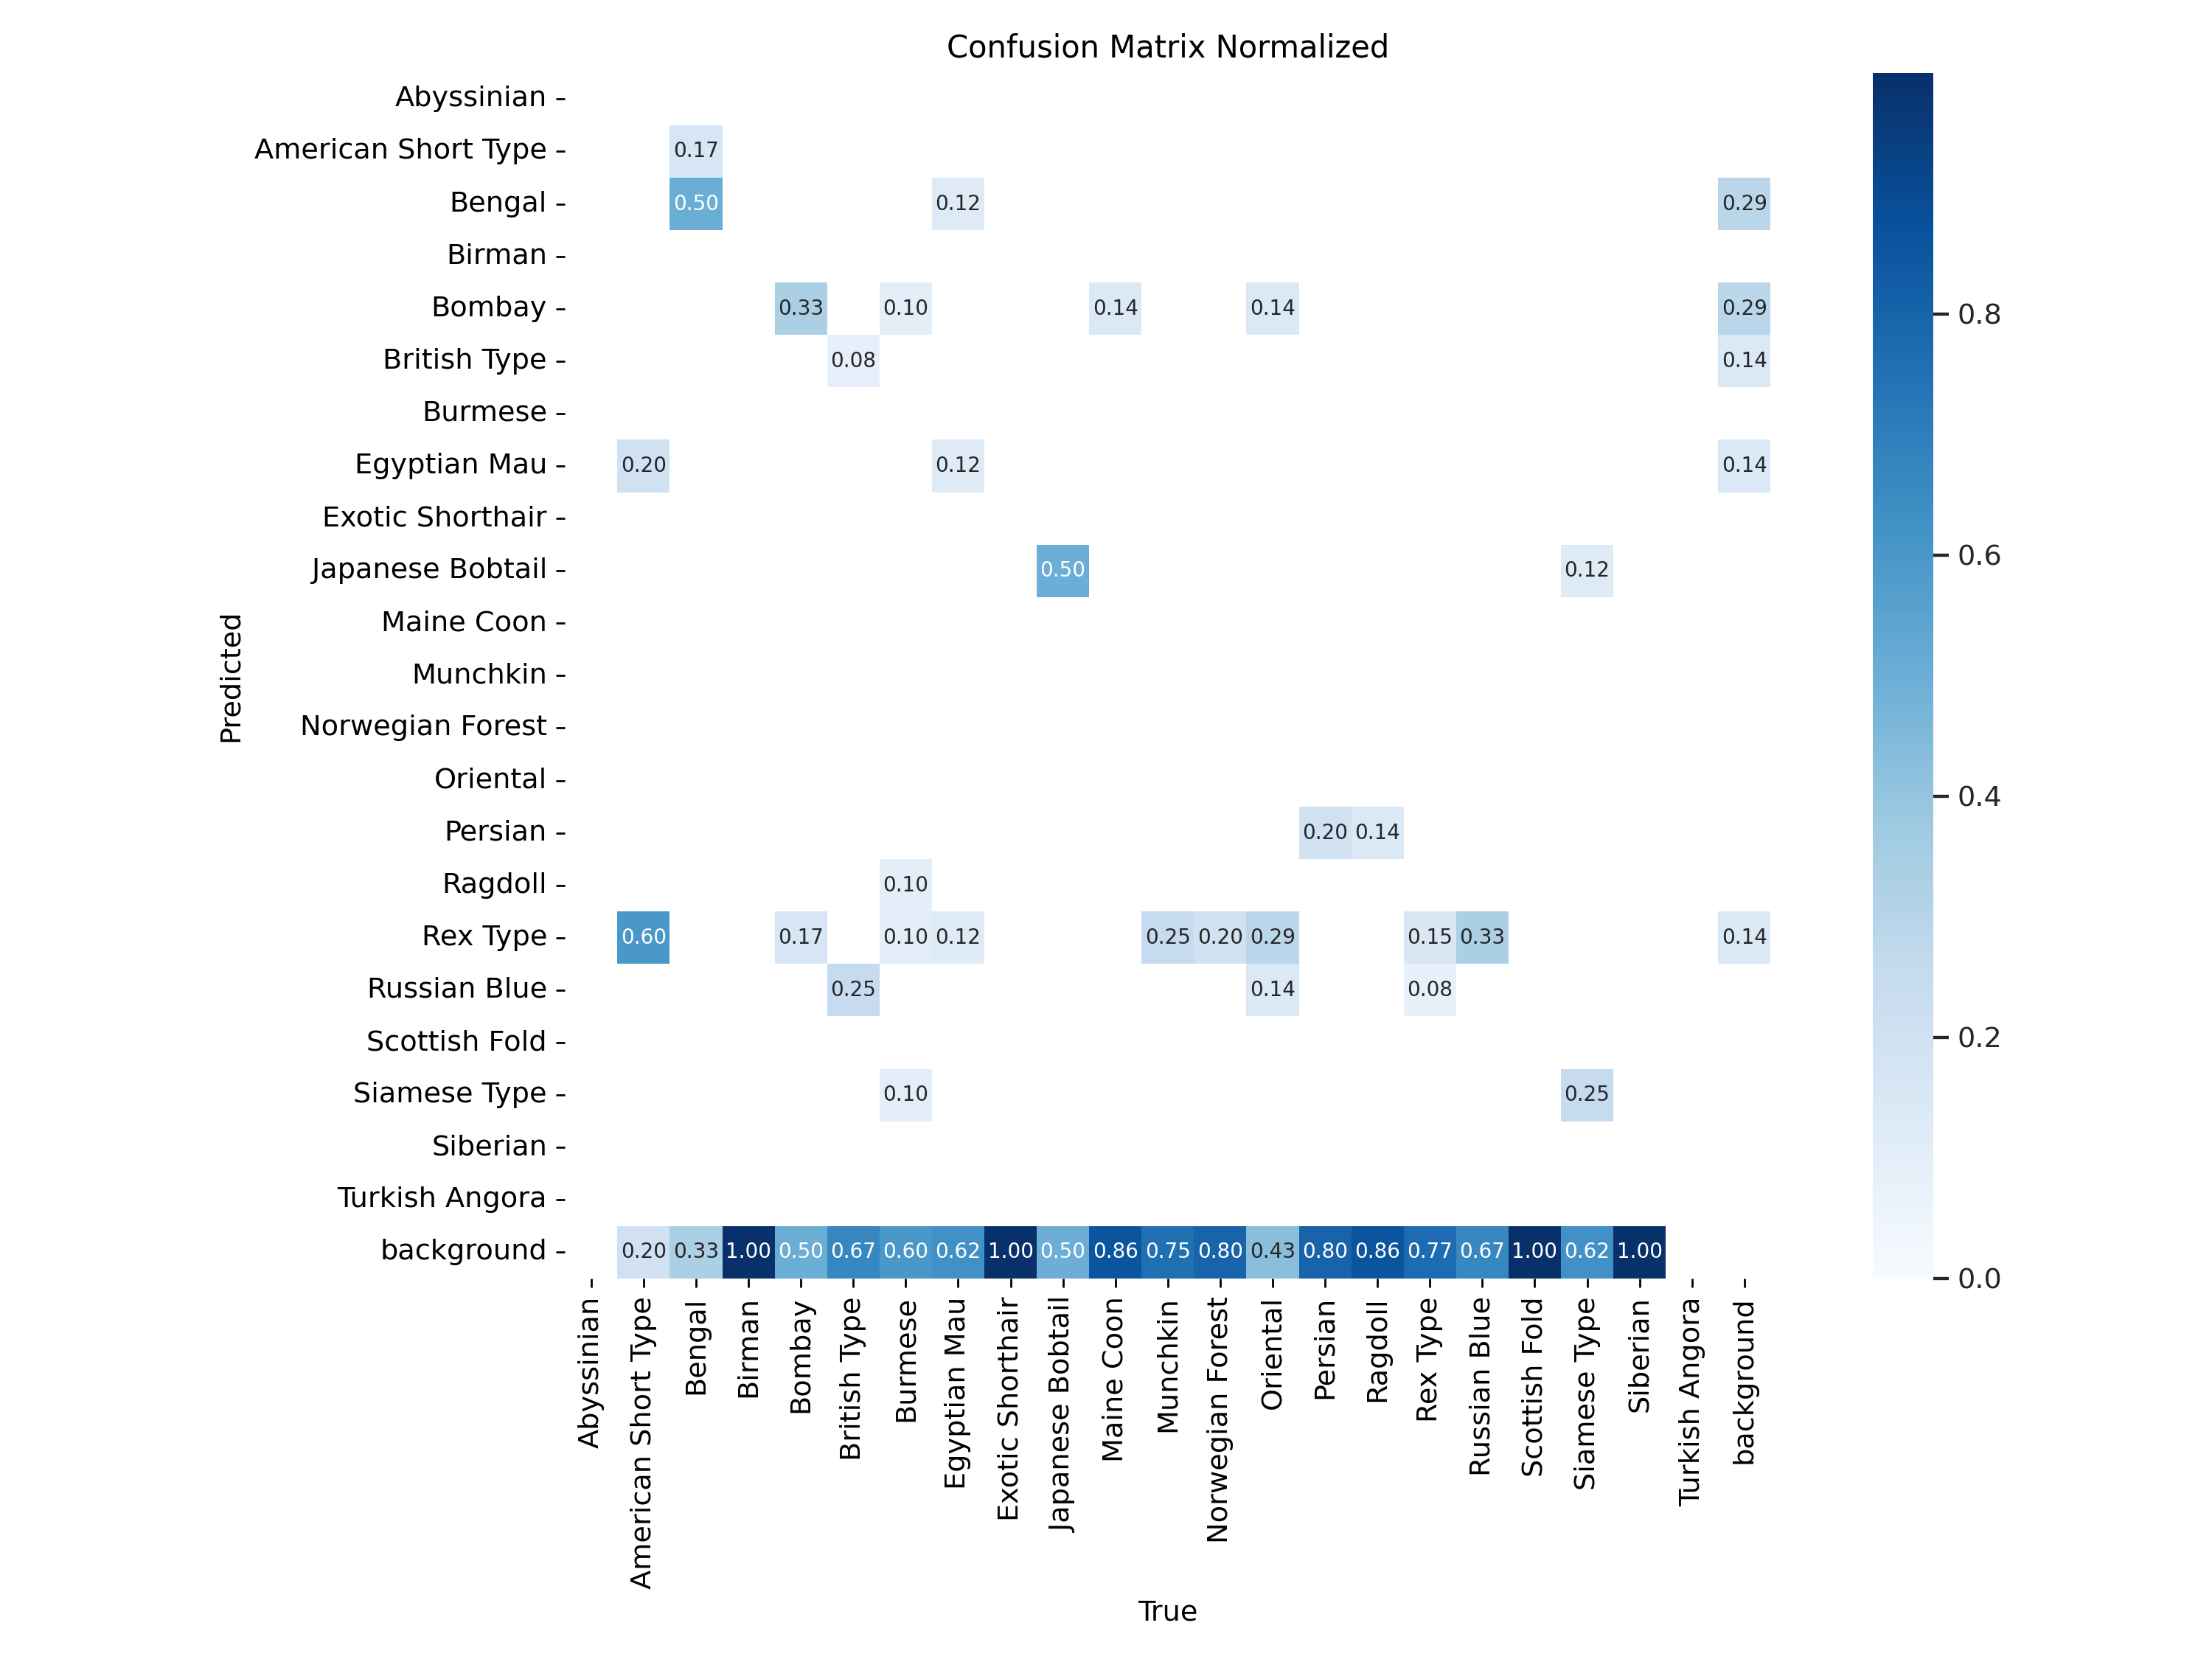

In [21]:
# 테스트 데이터셋 결과를 혼동 행렬 이미지로 시각화
show_image(f"runs/detect/test_result/confusion_matrix_normalized.png", width=800, height=800)

In [62]:
test_inference_name = "test_predict"
image_paths = glob.glob('/content/test/images/*jpg')
# 설정한 배치 크기
batch_size = 4

# 이미지 경로를 배치 크기에 맞춰 분할
test_inference_results = []
for i in tqdm(range(0, len(image_paths), batch_size)):
    batch_paths = image_paths[i:i + batch_size]
    results = model.predict(project=project,
                            source=batch_paths,
                            name=test_inference_name,
                            device='cuda',
                            imgsz=640, save=True,
                            save_txt=True,
                            save_conf=True,
                            show_conf=False,
                            exist_ok=True)

    # 최신 버전에서는 이 줄 제거
    # for item in results:
    #     del item.orig_img
    test_inference_results.append(results)

# 배치사이즈 만큼 묶여 있는 리스트를 풀어줌
test_inference_results = sum(test_inference_results,[])

# 추론 결과 저장
import pickle
import os

# 저장 디렉토리 생성 (없다면)
os.makedirs('./inference_results', exist_ok=True)

# 추론 결과 저장
with open('./inference_results/test_inference_results.pkl', 'wb') as f:
    pickle.dump(test_inference_results, f)

# 저장 확인용 메시지
print(f"Inference results saved. Total results: {len(test_inference_results)}")

  0%|          | 0/26 [00:00<?, ?it/s]


0: 640x640 (no detections), 13.0ms
1: 640x640 1 Bombay, 1 Rex Type, 13.0ms
2: 640x640 (no detections), 13.0ms
3: 640x640 1 Bengal, 1 Egyptian Mau, 13.0ms
Speed: 1.7ms preprocess, 13.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


  4%|▍         | 1/26 [00:00<00:02,  9.24it/s]


0: 640x640 (no detections), 12.7ms
1: 640x640 (no detections), 12.7ms
2: 640x640 1 Bombay, 12.7ms
3: 640x640 1 Russian Blue, 12.7ms
Speed: 1.3ms preprocess, 12.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


  8%|▊         | 2/26 [00:00<00:02,  9.31it/s]


0: 640x640 1 Egyptian Mau, 12.4ms
1: 640x640 (no detections), 12.4ms
2: 640x640 1 Japanese Bobtail, 12.4ms
3: 640x640 (no detections), 12.4ms
Speed: 1.3ms preprocess, 12.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


 12%|█▏        | 3/26 [00:00<00:02,  9.59it/s]


0: 640x640 (no detections), 11.2ms
1: 640x640 1 British Type, 11.2ms
2: 640x640 (no detections), 11.2ms
3: 640x640 (no detections), 11.2ms
Speed: 1.3ms preprocess, 11.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels

0: 640x640 (no detections), 11.2ms
1: 640x640 1 Russian Blue, 11.2ms
2: 640x640 (no detections), 11.2ms
3: 640x640 (no detections), 11.2ms
Speed: 1.3ms preprocess, 11.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


 19%|█▉        | 5/26 [00:00<00:02, 10.27it/s]


0: 640x640 1 Rex Type, 9.3ms
1: 640x640 (no detections), 9.3ms
2: 640x640 1 Rex Type, 9.3ms
3: 640x640 1 Bengal, 9.3ms
Speed: 1.3ms preprocess, 9.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels

0: 640x640 (no detections), 9.2ms
1: 640x640 (no detections), 9.2ms
2: 640x640 (no detections), 9.2ms
3: 640x640 (no detections), 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


 27%|██▋       | 7/26 [00:00<00:01, 10.22it/s]


0: 640x640 1 Rex Type, 9.2ms
1: 640x640 1 Rex Type, 9.2ms
2: 640x640 (no detections), 9.2ms
3: 640x640 1 Bombay, 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels

0: 640x640 (no detections), 9.2ms
1: 640x640 1 Bombay, 9.2ms
2: 640x640 (no detections), 9.2ms
3: 640x640 (no detections), 9.2ms
Speed: 1.5ms preprocess, 9.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


 35%|███▍      | 9/26 [00:00<00:01, 10.25it/s]


0: 640x640 1 Ragdoll, 9.2ms
1: 640x640 1 Rex Type, 9.2ms
2: 640x640 (no detections), 9.2ms
3: 640x640 (no detections), 9.2ms
Speed: 1.3ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels

0: 640x640 (no detections), 9.2ms
1: 640x640 (no detections), 9.2ms
2: 640x640 (no detections), 9.2ms
3: 640x640 (no detections), 9.2ms
Speed: 1.3ms preprocess, 9.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


 42%|████▏     | 11/26 [00:01<00:01, 10.67it/s]


0: 640x640 (no detections), 9.2ms
1: 640x640 (no detections), 9.2ms
2: 640x640 1 British Type, 9.2ms
3: 640x640 1 Persian, 9.2ms
Speed: 1.4ms preprocess, 9.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels

0: 640x640 (no detections), 9.2ms
1: 640x640 (no detections), 9.2ms
2: 640x640 (no detections), 9.2ms
3: 640x640 (no detections), 9.2ms
Speed: 1.3ms preprocess, 9.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


 50%|█████     | 13/26 [00:01<00:01, 10.94it/s]


0: 640x640 (no detections), 8.8ms
1: 640x640 (no detections), 8.8ms
2: 640x640 (no detections), 8.8ms
3: 640x640 1 Bengal, 8.8ms
Speed: 1.3ms preprocess, 8.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels

0: 640x640 (no detections), 8.5ms
1: 640x640 1 Bombay, 8.5ms
2: 640x640 (no detections), 8.5ms
3: 640x640 (no detections), 8.5ms
Speed: 1.4ms preprocess, 8.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


 58%|█████▊    | 15/26 [00:01<00:00, 11.11it/s]


0: 640x640 1 American Short Type, 1 Bengal, 8.3ms
1: 640x640 (no detections), 8.3ms
2: 640x640 (no detections), 8.3ms
3: 640x640 1 Rex Type, 8.3ms
Speed: 1.3ms preprocess, 8.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels

0: 640x640 1 British Type, 7.9ms
1: 640x640 (no detections), 7.9ms
2: 640x640 (no detections), 7.9ms
3: 640x640 1 Rex Type, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


 65%|██████▌   | 17/26 [00:01<00:00, 11.18it/s]


0: 640x640 (no detections), 7.9ms
1: 640x640 1 Russian Blue, 7.9ms
2: 640x640 (no detections), 7.9ms
3: 640x640 1 Bombay, 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels

0: 640x640 (no detections), 7.9ms
1: 640x640 1 British Type, 7.9ms
2: 640x640 1 Bengal, 7.9ms
3: 640x640 (no detections), 7.9ms
Speed: 1.5ms preprocess, 7.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


 73%|███████▎  | 19/26 [00:01<00:00, 10.92it/s]


0: 640x640 (no detections), 7.9ms
1: 640x640 (no detections), 7.9ms
2: 640x640 (no detections), 7.9ms
3: 640x640 1 Rex Type, 7.9ms
Speed: 1.6ms preprocess, 7.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels

0: 640x640 1 Russian Blue, 1 Siamese Type, 7.9ms
1: 640x640 (no detections), 7.9ms
2: 640x640 (no detections), 7.9ms
3: 640x640 1 Bombay, 7.9ms
Speed: 1.6ms preprocess, 7.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


 81%|████████  | 21/26 [00:01<00:00, 10.91it/s]


0: 640x640 (no detections), 7.9ms
1: 640x640 (no detections), 7.9ms
2: 640x640 1 Rex Type, 7.9ms
3: 640x640 (no detections), 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels

0: 640x640 1 Rex Type, 7.9ms
1: 640x640 (no detections), 7.9ms
2: 640x640 (no detections), 7.9ms
3: 640x640 (no detections), 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


 88%|████████▊ | 23/26 [00:02<00:00, 11.21it/s]


0: 640x640 (no detections), 7.9ms
1: 640x640 (no detections), 7.9ms
2: 640x640 (no detections), 7.9ms
3: 640x640 1 Bengal, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels

0: 640x640 1 Japanese Bobtail, 1 Rex Type, 7.8ms
1: 640x640 (no detections), 7.8ms
2: 640x640 (no detections), 7.8ms
3: 640x640 1 Rex Type, 7.8ms
Speed: 2.1ms preprocess, 7.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


 96%|█████████▌| 25/26 [00:02<00:00, 11.28it/s]


0: 640x640 1 Russian Blue, 7.6ms
1: 640x640 (no detections), 7.6ms
2: 640x640 1 Egyptian Mau, 7.6ms
3: 640x640 (no detections), 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_predict
42 labels saved to runs/detect/test_predict/labels


100%|██████████| 26/26 [00:02<00:00, 10.88it/s]


Inference results saved. Total results: 104


In [66]:
map50_95 = test_result.results_dict['metrics/mAP50-95(B)']
map50 = test_result.results_dict['metrics/mAP50(B)']

print(f"mAP50-95: {map50_95}")
print(f"mAP50: {map50}")

mAP50-95: 0.17669248150050032
mAP50: 0.26308915290052204


In [76]:
# labels 폴더 아래의 모든 txt 파일 경로 가져오기
txt_files = glob.glob('/content/test/labels/*.txt')

# DataFrame을 저장할 리스트 생성
data = []

# 각 txt 파일을 읽어서 DataFrame에 추가
for txt_file in txt_files:
    with open(txt_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 2:  # class id와 bounding box 정보가 있는지 확인
                class_id = int(parts[0])
                bbox = [float(x) for x in parts[1:]]
                image_name = os.path.splitext(os.path.basename(txt_file))[0] + ".jpg"  # 이미지 파일 이름 추출 (.txt를 .jpg로 변경)
                data.append([image_name, class_id, bbox])


# DataFrame 생성
labels_df = pd.DataFrame(data, columns=['image_name', 'class_id', 'bbox'])

# class id를 label 이름으로 변환 (model.names를 사용)
labels_df['label'] = labels_df['class_id'].map(lambda x: model.names[x])

# image_name을 index로 설정
labels_df = labels_df.set_index('image_name')

print(labels_df.head())

                                                    class_id  \
image_name                                                     
Bombay_35_jpg.rf.9ec92ab01bba9efa012cdec7e74108...         4   
American-Wirehair_30_jpg.rf.16fa6d6ae466e5b5076...         1   
Maine-Coon_47_jpg.rf.e351ff33537b376373f972379a...        10   
Scottish-Fold_19_jpg.rf.d5d6aaa0b25ae159f6af781...        19   
Siamese_2_jpg.rf.fec19aff9b1d15d302dd150ad11f98...        19   

                                                                                               bbox  \
image_name                                                                                            
Bombay_35_jpg.rf.9ec92ab01bba9efa012cdec7e74108...        [0.24375, 0.47734375, 0.3078125, 0.44375]   
American-Wirehair_30_jpg.rf.16fa6d6ae466e5b5076...      [0.45703125, 0.4875, 0.88984375, 0.7703125]   
Maine-Coon_47_jpg.rf.e351ff33537b376373f972379a...         [0.50703125, 0.440625, 0.9859375, 0.825]   
Scottish-Fold_19_jpg.rf.d5d6aaa0b25a

In [32]:
import os
from collections import Counter
from pathlib import Path
import re

def extract_base_names(folder_path):
    # 이미지 파일 확장자
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')

    # 파일 이름 리스트 생성
    base_names = []
    for file in Path(folder_path).rglob('*'):
        if file.suffix.lower() in image_extensions:
            # 영문자만 추출 (숫자와 특수문자 이전까지)
            base_name = re.match(r'^[a-zA-Z]+', file.stem)
            if base_name:
                base_names.append(base_name.group())

    # 빈도수 계산
    name_counts = Counter(base_names)

    # 결과 출력
    print("\n파일 이름 빈도수:")
    print("-" * 30)
    for name, count in name_counts.most_common():
        print(f"{name}: {count}개")
    print("-" * 30)
    print(f"총 고유 파일 이름 수: {len(name_counts)}개")
    print(f"총 이미지 파일 수: {len(base_names)}개")

# 실행
folder_path = "test"
extract_base_names(folder_path)


파일 이름 빈도수:
------------------------------
Oriental: 8개
British: 8개
Burmese: 8개
Bombay: 6개
Maine: 6개
Russian: 5개
Bengal: 5개
Balinese: 5개
Norwegian: 5개
Devon: 5개
Persian: 5개
Munchkin: 4개
American: 4개
Ragdoll: 4개
Egyptian: 4개
Scottish: 4개
Cornish: 4개
German: 3개
Siberian: 3개
Exotic: 3개
Japanese: 2개
Siamese: 2개
Birman: 1개
------------------------------
총 고유 파일 이름 수: 23개
총 이미지 파일 수: 104개


In [ ]:
from google.colab import files
import shutil

shutil.make_archive("runs", 'zip', "/content/runs")
files.download("runs1.zip")